In [1]:
import pandas as pd
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Processing

In [2]:
data = pd.read_csv('Responses.csv')
data.drop('Timestamp', axis=1, inplace=True)
cols = data.columns
data = data.to_numpy()
# print(data)

In [3]:
categories = {}
categories[("I like it", "I like it")] = "Questionable"
categories[("I like it", "I expect it")] = "Excitement"
categories[("I like it", "I am neutral")] = "Excitement"
categories[("I like it", "I can tolerate it")] = "Excitement"
categories[("I like it", "I dislike it")] = "Performance"

categories[("I expect it", "I like it")] = "Rejection"
categories[("I expect it", "I expect it")] = "Indifference"
categories[("I expect it", "I am neutral")] = "Indifference"
categories[("I expect it", "I can tolerate it")] = "Indifference"
categories[("I expect it", "I dislike it")] = "Threshold"

categories[("I am neutral", "I like it")] = "Rejection"
categories[("I am neutral", "I expect it")] = "Indifference"
categories[("I am neutral", "I am neutral")] = "Indifference"
categories[("I am neutral", "I can tolerate it")] = "Indifference"
categories[("I am neutral", "I dislike it")] = "Threshold"

categories[("I can tolerate it", "I like it")] = "Rejection"
categories[("I can tolerate it", "I expect it")] = "Indifference"
categories[("I can tolerate it", "I am neutral")] = "Indifference"
categories[("I can tolerate it", "I can tolerate it")] = "Indifference"
categories[("I can tolerate it", "I dislike it")] = "Threshold"

categories[("I dislike it", "I like it")] = "Rejection"
categories[("I dislike it", "I expect it")] = "Rejection"
categories[("I dislike it", "I am neutral")] = "Rejection"
categories[("I dislike it", "I can tolerate it")] = "Rejection"
categories[("I dislike it", "I dislike it")] = "Questionable"

In [4]:
# cols = data.columns
# print(cols)
responses = {}
choices = ["I like it", "I expect it", "I am neutral",  "I can tolerate it", "I dislike it"]
categorization = {}
category_names = ["Excitement", "Performance", "Threshold", "Indifference", "Rejection", "Questionable"]
combos = []
for i in range(5):
    for j in range(5):
        combos.append((choices[i],choices[j]))
features = []
for i in range(-12, 0):
    features.append(cols[i].split("[")[-1][:-1])
    responses[features[i + 12]] = {}
    categorization[features[i + 12]] = {}
    for j in range(len(combos)):
        responses[features[i + 12]][combos[j]] = 0
    for j in range(len(category_names)):
        categorization[features[i + 12]][category_names[j]] = 0
    # print(len(responses[features[i + 12]]))

In [5]:
for i in data:
    # print(i)
    for j in range(-12,0):
        # print(i[j-12], i[j])
        responses[features[j + 12]][(i[j-12], i[j])] += 1
        categorization[features[j + 12]][categories[(i[j-12], i[j])]] += 1
        # responses[features[j + 12]][(i[j], i[j-12])] += 1
        # print(responses[features[j+12]][(i[j-12], i[j])])

# print(responses)
# print(func_responses)
# print(dysfunc_responses)
print(categorization)

{'Unskippable Advertisements': {'Excitement': 0, 'Performance': 0, 'Threshold': 0, 'Indifference': 2, 'Rejection': 17, 'Questionable': 0}, 'Picutre-in-Picture Mode': {'Excitement': 5, 'Performance': 3, 'Threshold': 1, 'Indifference': 9, 'Rejection': 1, 'Questionable': 0}, 'Video Preview': {'Excitement': 11, 'Performance': 2, 'Threshold': 0, 'Indifference': 5, 'Rejection': 1, 'Questionable': 0}, 'Auto-Generated Subtitles': {'Excitement': 5, 'Performance': 4, 'Threshold': 4, 'Indifference': 6, 'Rejection': 0, 'Questionable': 0}, 'Auto-Translated Audio': {'Excitement': 11, 'Performance': 1, 'Threshold': 0, 'Indifference': 7, 'Rejection': 0, 'Questionable': 0}, 'Likes': {'Excitement': 0, 'Performance': 2, 'Threshold': 6, 'Indifference': 11, 'Rejection': 0, 'Questionable': 0}, 'Dislikes': {'Excitement': 0, 'Performance': 2, 'Threshold': 7, 'Indifference': 10, 'Rejection': 0, 'Questionable': 0}, 'Comments': {'Excitement': 0, 'Performance': 4, 'Threshold': 9, 'Indifference': 6, 'Rejection': 0

## Confusion Matrices

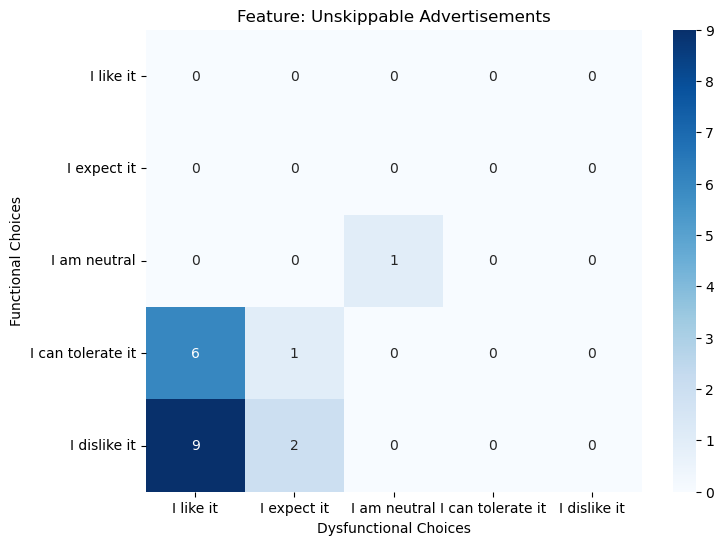

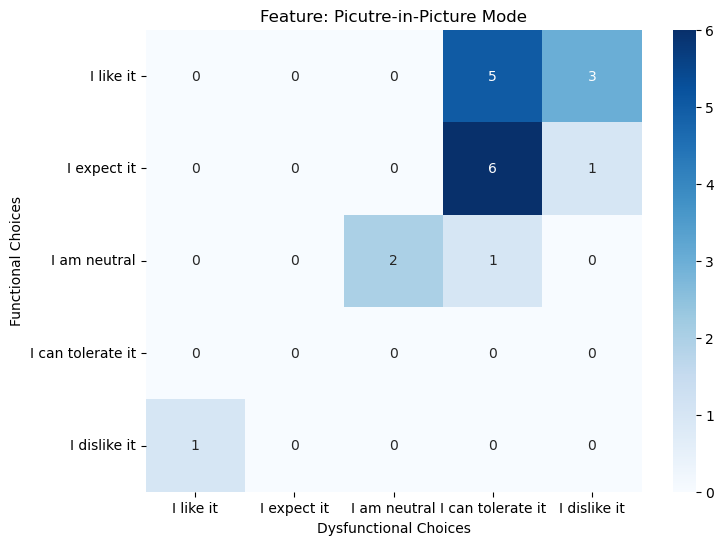

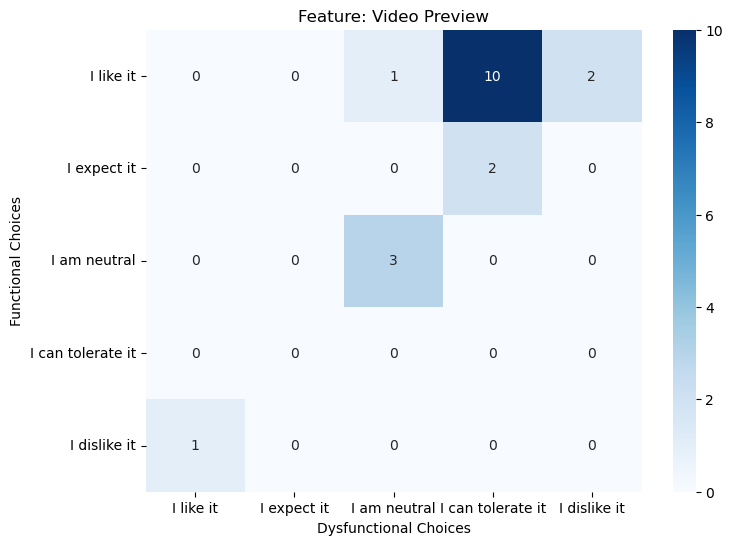

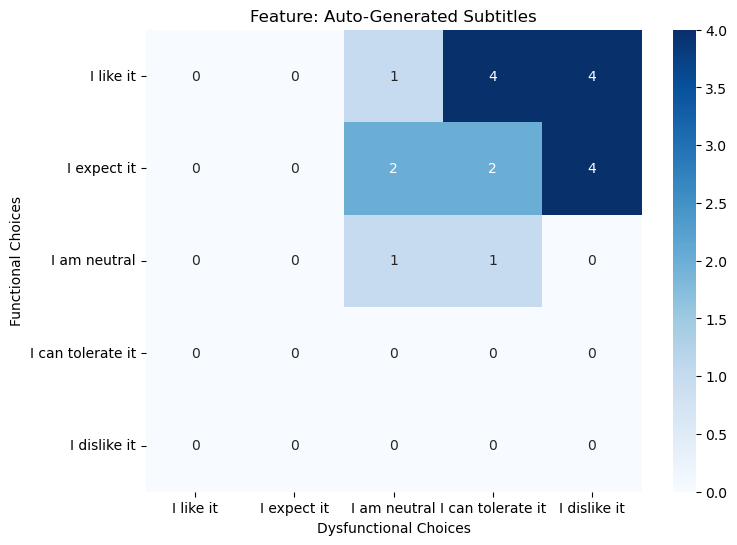

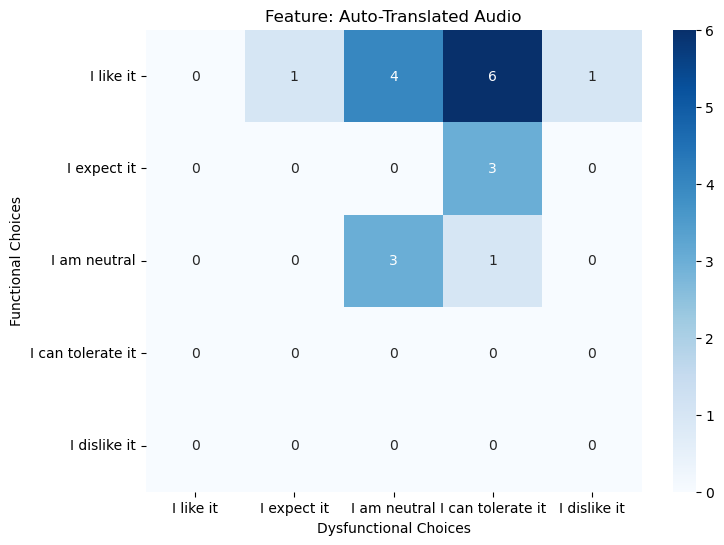

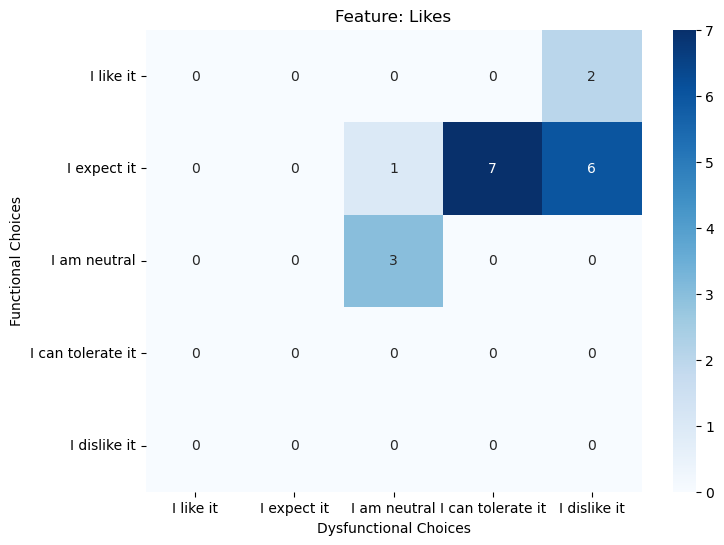

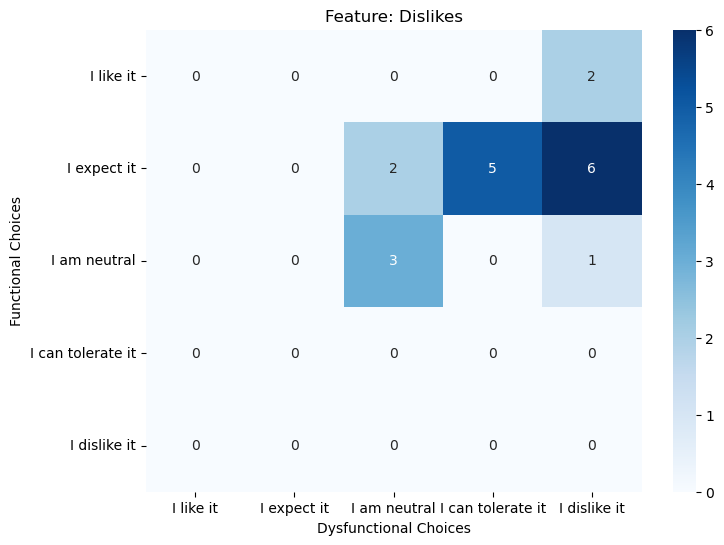

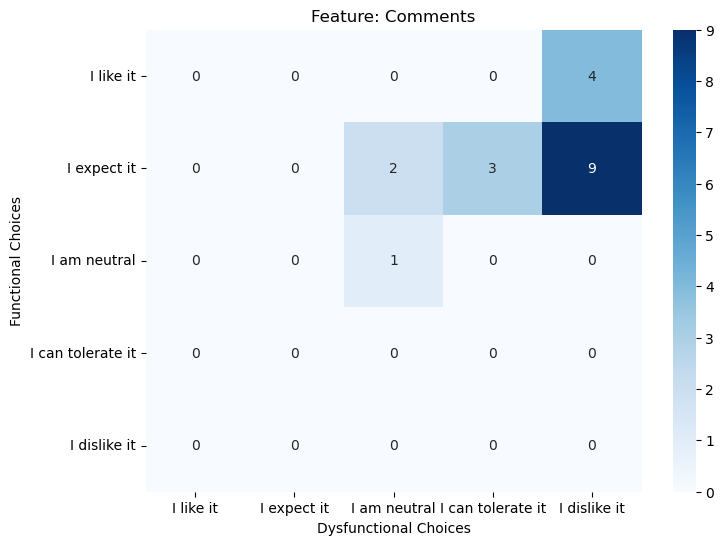

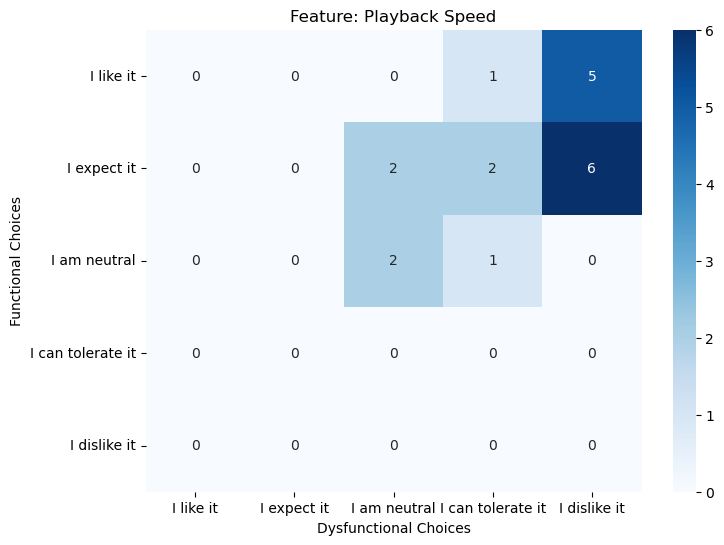

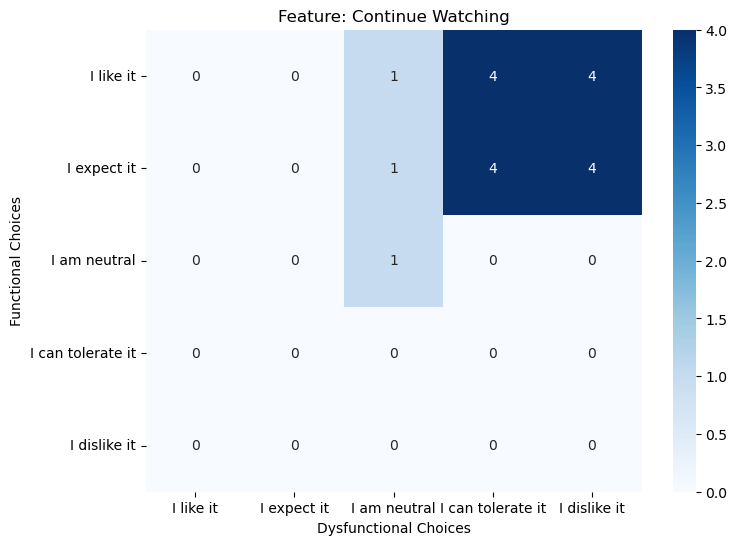

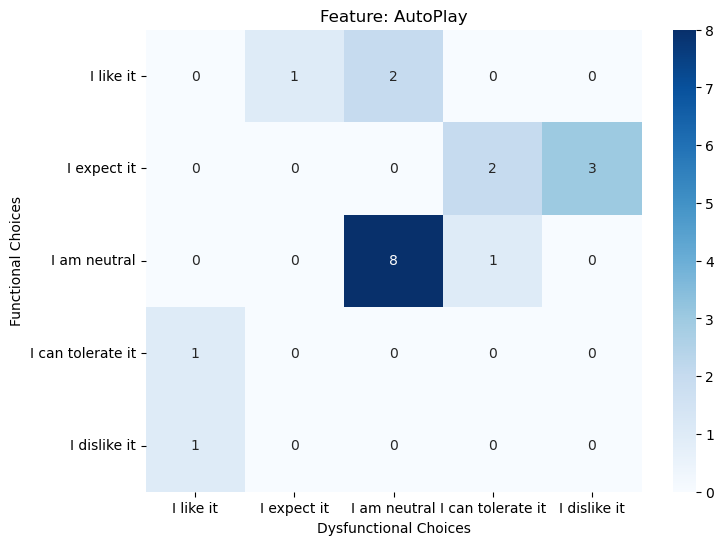

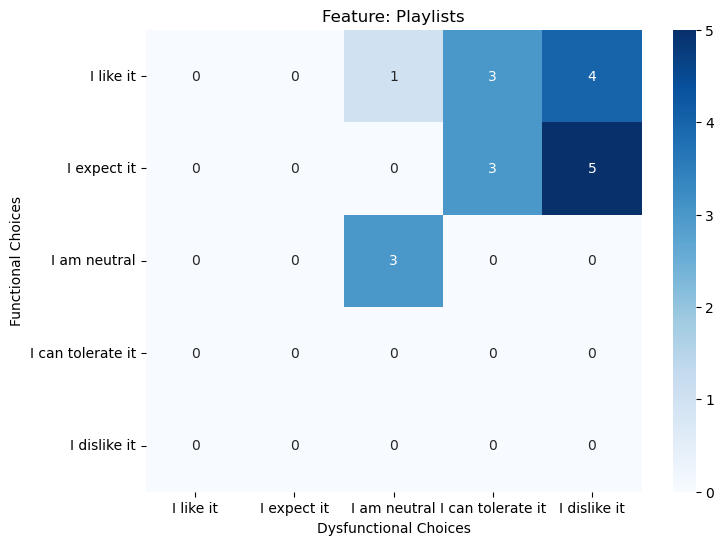

In [126]:
for feature in features:
    # vals = [["Funcctional", "Dysfunctional"]]
    # Initialize an empty DataFrame
    # print("Feature: ", feature)
    data = responses[feature]
    confusion_matrix = pd.DataFrame(0, index=choices, columns=choices)

    # Populate the confusion matrix
    for key in data:
        # print(data[key], data[(key[1],key[0])])
        confusion_matrix.loc[key[0], key[1]] = data[key]

    # print(confusion_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Feature: " + feature)
    plt.xlabel("Dysfunctional Choices")
    plt.ylabel("Functional Choices")
    plt.show()
    print()
    print()

## Attribute Distribution for each Feature

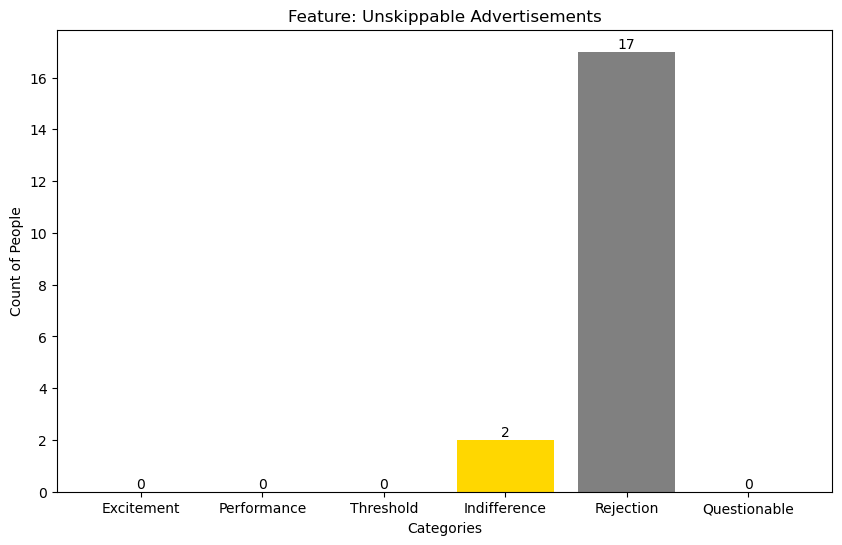

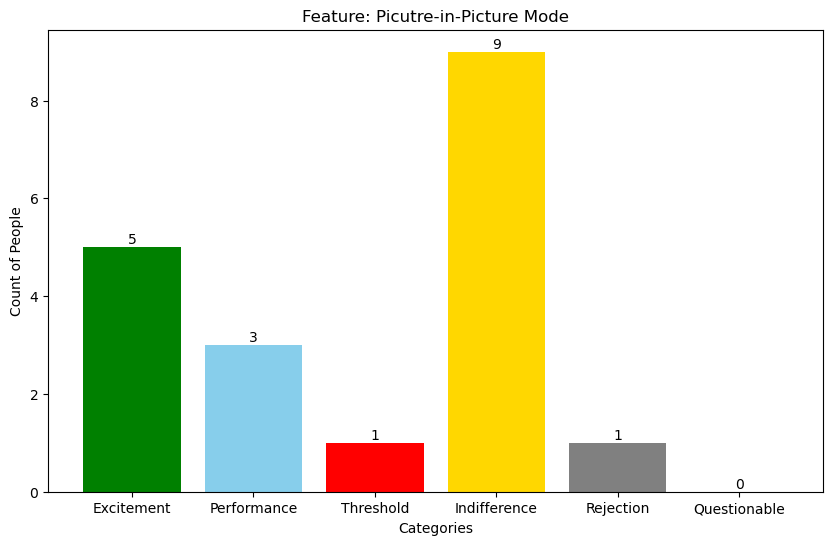

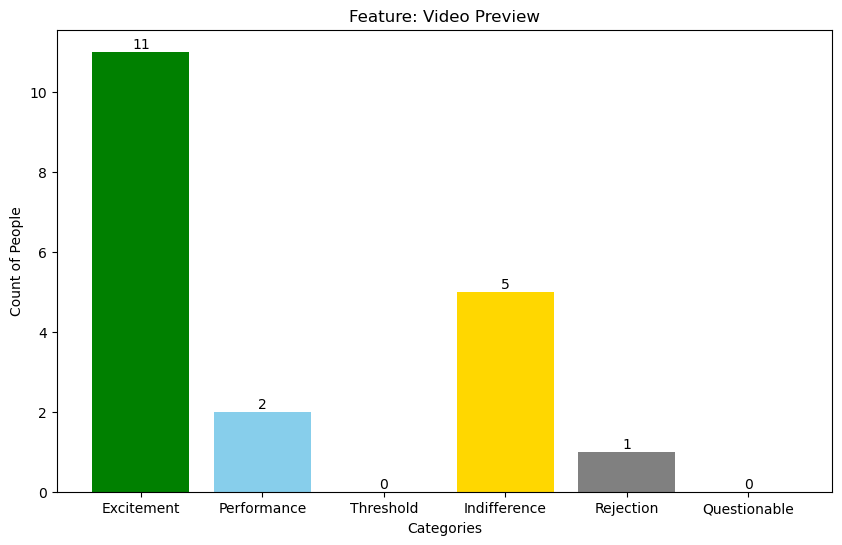

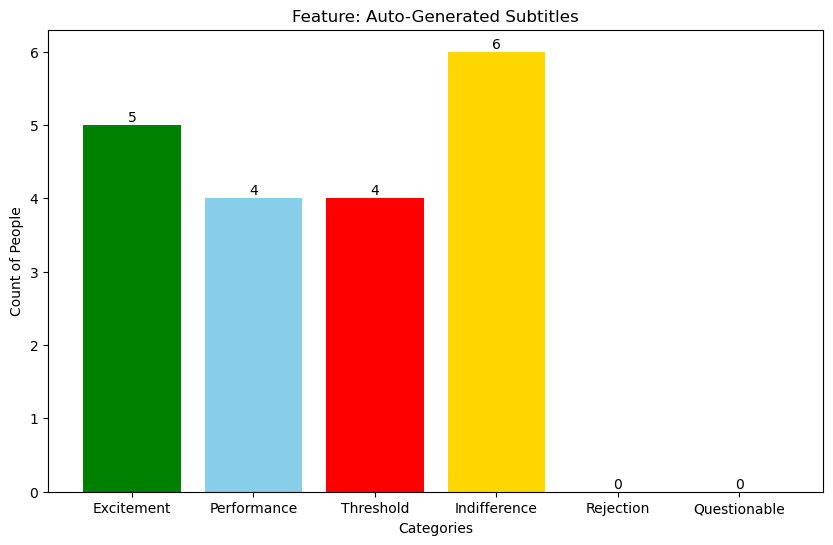

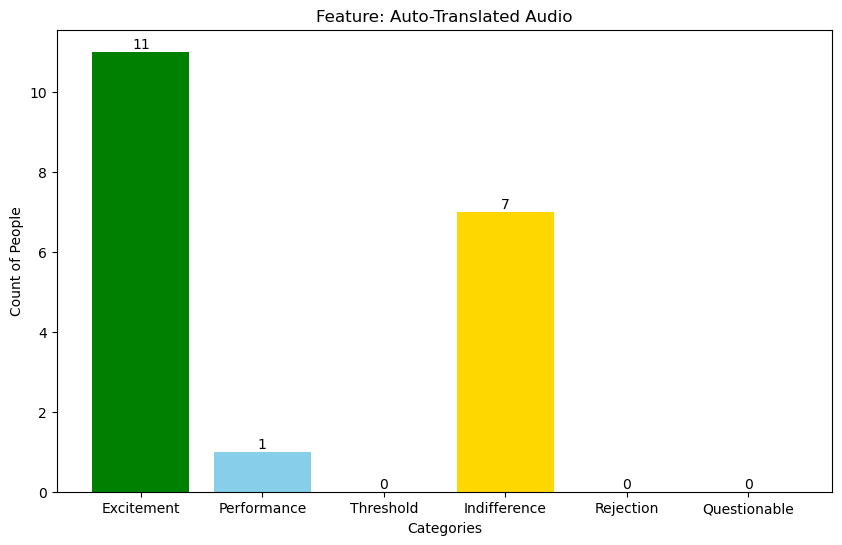

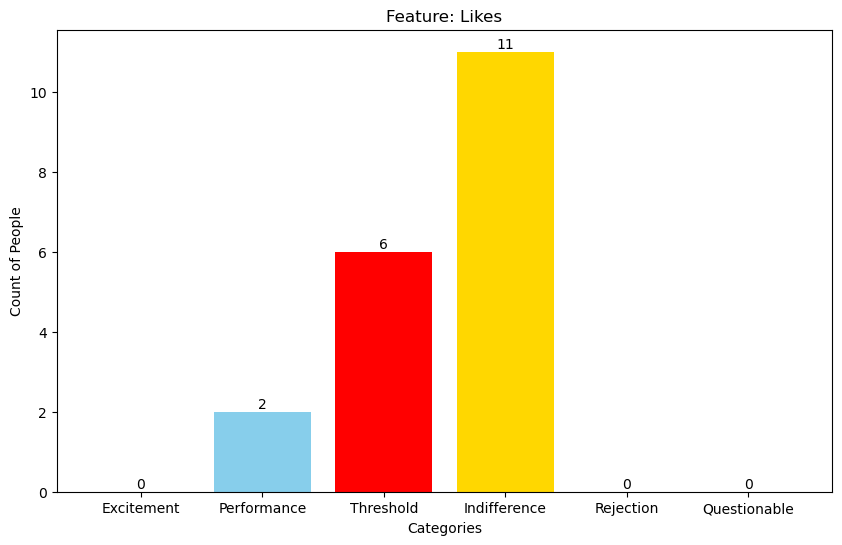

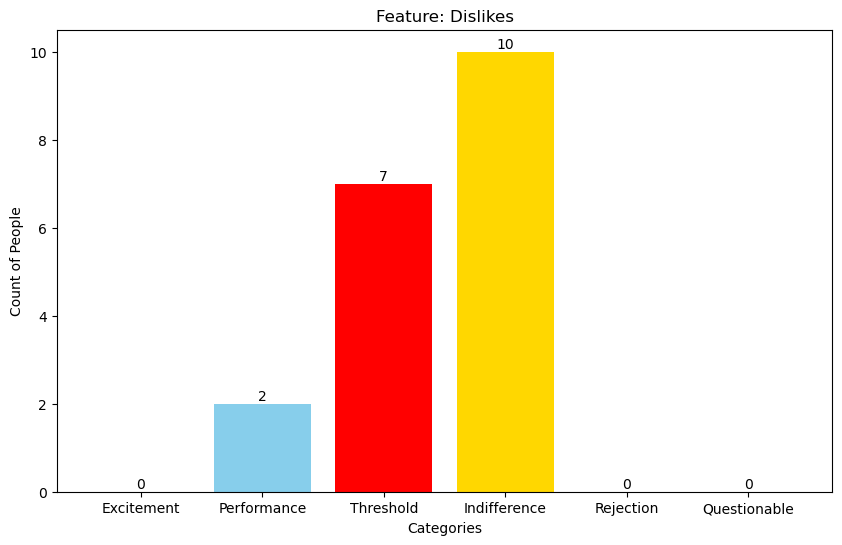

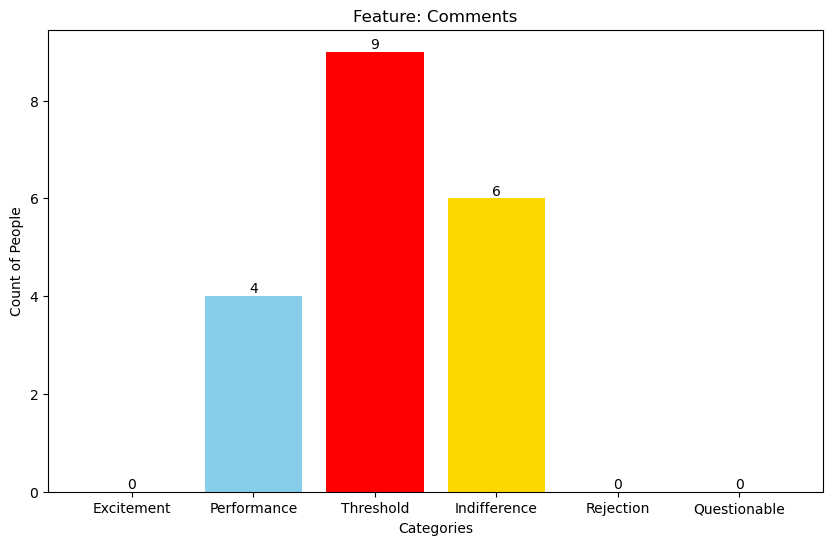

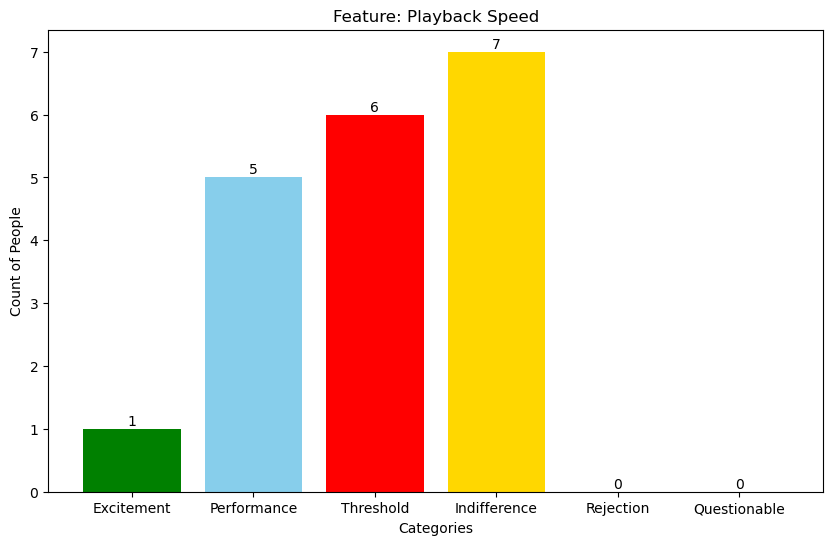

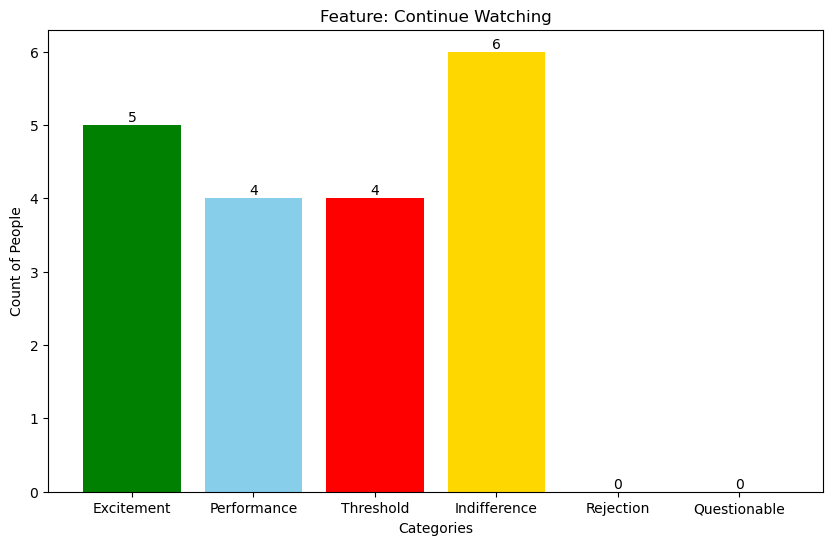

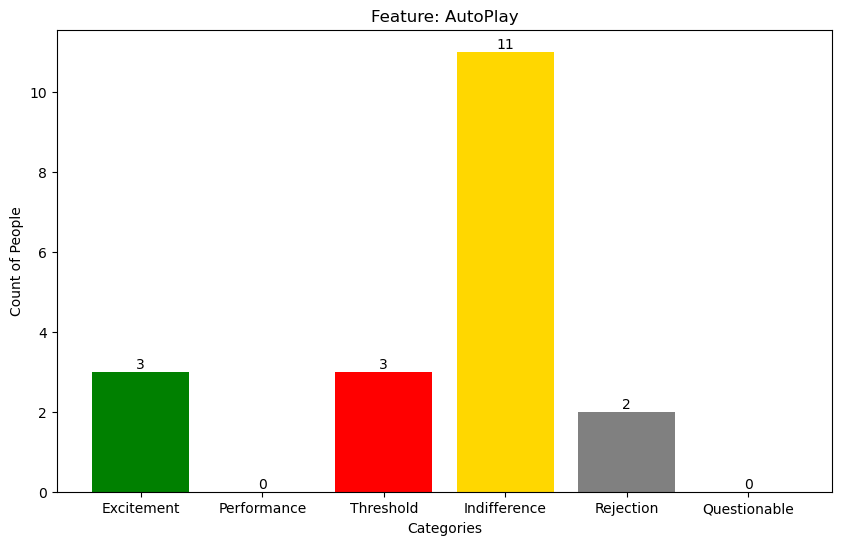

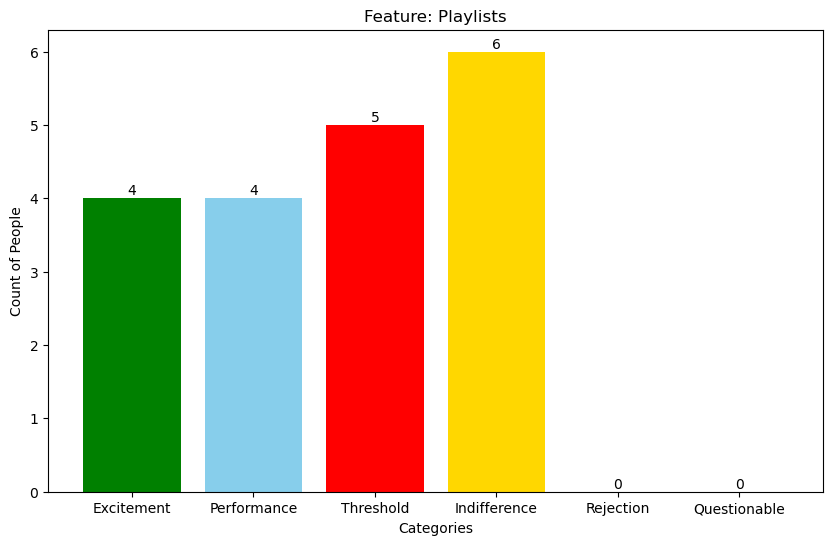

In [146]:
for feature in features:
    # Sample dictionary
    data = categorization[feature]

    # Extract keys and values
    keys = list(data.keys())
    values = list(data.values())

    # Define a color for each key
    colors = ['green', 'skyblue', 'red', 'gold', 'grey', 'purple']

    # Plotting the bar graph with different colors for each bar
    plt.figure(figsize=(10, 6))
    bars = plt.bar(keys, values, color=colors)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, int(yval), ha='center', va='bottom')


    plt.title("Feature: " + feature)
    plt.xlabel("Categories")
    plt.ylabel("Count of People")
    plt.show()

## Customer Satisfaction Coefficients

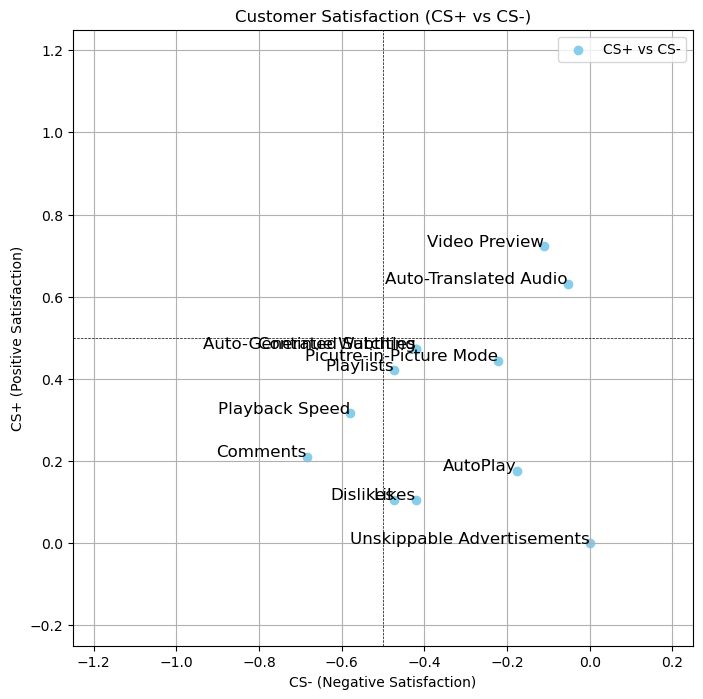

In [157]:
CS_plus = []
CS_minus = []

for feature in features:
    data = categorization[feature]
    div_by = data["Excitement"] + data["Performance"] + data["Threshold"] + data["Indifference"]
    CS_plus.append((data["Excitement"] + data["Performance"]) / div_by)
    CS_minus.append(-1*(data["Threshold"] + data["Performance"]) / div_by)

# print(CS_plus)
# print(CS_minus)

# Plotting the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(CS_minus, CS_plus, color='skyblue', label='CS+ vs CS-')

# Adding labels and titles
plt.title('Customer Satisfaction (CS+ vs CS-)')
plt.xlabel('CS- (Negative Satisfaction)')
plt.ylabel('CS+ (Positive Satisfaction)')

# Optionally, annotate each point with its index or other identifiers
for i, (x, y) in enumerate(zip(CS_minus, CS_plus)):
    plt.text(x, y, f'{features[i]}', fontsize=12, ha='right')

# Draw reference lines at 0.5 for both axes, if needed
plt.axhline(0.5, color='black', linewidth=0.5, linestyle='--')
plt.axvline(-0.5, color='black', linewidth=0.5, linestyle='--')

# Set axis limits for better visualization
plt.xlim(-1.25, 0.25)
plt.ylim(-0.25, 1.25)

# Display the plot
plt.grid(True)
plt.legend()
plt.show()


## Statistical Significance

In [7]:
SS = {}
n = 19

for feature in features:
    data = categorization[feature]
    a = data[category_names[0]]
    b = 0
    for category in category_names[1:]:
        if data[category] > b:
            if(data[category] > a):
                b = a
                a = data[category]
            else:
                b = data[category]
    
    fong_val = 1.65*np.sqrt((a+b)*(2*n - a - b)/(2*n))
    if(a-b < fong_val):
        SS[feature] = "Insignificant"
    else:
        SS[feature] = "Significant"

print(SS)

{'Unskippable Advertisements': 'Significant', 'Picutre-in-Picture Mode': 'Insignificant', 'Video Preview': 'Significant', 'Auto-Generated Subtitles': 'Insignificant', 'Auto-Translated Audio': 'Insignificant', 'Likes': 'Insignificant', 'Dislikes': 'Insignificant', 'Comments': 'Insignificant', 'Playback Speed': 'Insignificant', 'Continue Watching': 'Insignificant', 'AutoPlay': 'Significant', 'Playlists': 'Insignificant'}
